# **Case study: Analysis and Optimization of Energy Consumption**

### Necessary imports

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# **Phase 1: Data collection and preparation**

Objective: Prepare a clean, usable dataset for analysis and modeling.

## 1- Data collection

*- Identify and gather data from a variety of accessible sources (e.g. internal company data, public data, IoT sensors, weather data ....).*

*- The choice of data sources is free, but they must be relevant to the analysis of energy consumption.*

For this project, we chose a dataset on energy consumption, specifically electricity usage data from 881 companies and local authorities across six French overseas regions : Réunion Island, French Guiana, Martinique, Guadeloupe, Mayotte, and Corsica. The data was collected between 2021 and 2024.

We aim to use this dataset to predict the weekly energy consumption of a company.

## 2- Cleaning and Data Preparation :

*- Manage missing values, inconsistencies and anomalies (e.g. outliers).*

*- Standardize formats (dates, consumption units, etc.) to guarantee data consistency.*

*- Create new variables if necessary, such as consumption periods (off-peak, peak, seasonal, etc.).*

Let's start by loading our dataset and transform it into a Pandas dataframe. It will be easier to use for our project:

In [4]:
data = pd.read_csv('dataset.csv')

Let's see what our data looks like:

In [5]:
data.head()

,year-Wweek,user_id,site_id,department,nace_code,insee_code,weekly_E_kWh,weekly_dd_heating_15,weekly_dd_heating_16,weekly_dd_heating_17,...,min_indoor_humidity_13,mean_indoor_humidity_14,max_indoor_humidity_14,min_indoor_humidity_14,mean_indoor_humidity_15,max_indoor_humidity_15,min_indoor_humidity_15,mean_indoor_humidity_16,max_indoor_humidity_16,min_indoor_humidity_16
0,2021-W19,458,513,Martinique,72.19,97209,645.595,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-W20,458,513,Martinique,72.19,97209,621.710,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-W21,458,513,Martinique,72.19,97209,593.756,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-W22,458,513,Martinique,72.19,97209,598.007,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-W23,458,513,Martinique,72.19,97209,616.960,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(42288, 112)

Our dataset contains 42,288 records and 112 columns.

### 2.1- Missing values

It appears that we have several NaN values. Let's organize this properly.

Let's look at how many missing values per feature our data contains:

In [7]:
data.isnull().sum()

year-Wweek                     0
user_id                        0
site_id                        0
department                     0
nace_code                      0
                           ...  
max_indoor_humidity_15     42254
min_indoor_humidity_15     42254
mean_indoor_humidity_16    42254
max_indoor_humidity_16     42254
min_indoor_humidity_16     42254
Length: 112, dtype: int64

Let's look at the pourcentage of missing values per feature (it's more intuitive):

In [8]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage

year-Wweek                  0.000000
user_id                     0.000000
site_id                     0.000000
department                  0.000000
nace_code                   0.000000
                             ...    
max_indoor_humidity_15     99.919599
min_indoor_humidity_15     99.919599
mean_indoor_humidity_16    99.919599
max_indoor_humidity_16     99.919599
min_indoor_humidity_16     99.919599
Length: 112, dtype: float64

First, we decide to delete all columns that have more than half of their values missing. Let's look at the columns that fit that criteria:

In [9]:
columns_with_high_missing = missing_percentage[missing_percentage > 50]

print("Columns with more than 50% missing values:")
columns_with_high_missing

Columns with more than 50% missing values:


mean_indoor_temperature_02    98.607170
max_indoor_temperature_02     98.607170
min_indoor_temperature_02     98.607170
mean_indoor_temperature_03    98.678112
max_indoor_temperature_03     98.678112
                                ...    
max_indoor_humidity_15        99.919599
min_indoor_humidity_15        99.919599
mean_indoor_humidity_16       99.919599
max_indoor_humidity_16        99.919599
min_indoor_humidity_16        99.919599
Length: 84, dtype: float64

We can see that 84 columns (out of 112) have more than 50% of values missing. We delete those columns:

In [10]:
data = data.dropna(thresh=2/4 * len(data), axis=1)

Let's look at the remaining features and their pourcentage of missing values:

In [11]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage

year-Wweek                     0.000000
user_id                        0.000000
site_id                        0.000000
department                     0.000000
nace_code                      0.000000
insee_code                     0.000000
weekly_E_kWh                  12.670261
weekly_dd_heating_15           1.515796
weekly_dd_heating_16           1.515796
weekly_dd_heating_17           1.515796
weekly_dd_heating_18           1.515796
weekly_dd_cooling_22           1.515796
weekly_dd_cooling_23           1.515796
weekly_dd_cooling_24           1.515796
weekly_dd_cooling_25           1.515796
weekly_dd_cooling_26           1.515796
mean_indoor_temperature_00    20.731650
max_indoor_temperature_00     20.731650
min_indoor_temperature_00     20.731650
mean_indoor_humidity_00       20.729285
max_indoor_humidity_00        20.729285
min_indoor_humidity_00        20.729285
mean_indoor_temperature_01    46.935301
max_indoor_temperature_01     46.935301
min_indoor_temperature_01     46.935301


We can see that 6 features have more than 45% of missing values. We decide that it is too much and therefore we delete them:

In [12]:
data = data.drop(columns=['mean_indoor_temperature_01',
                          'max_indoor_temperature_01',
                          'min_indoor_temperature_01',
                          'mean_indoor_humidity_01',
                          'max_indoor_humidity_01',
                          'min_indoor_humidity_01'])

Let's look at our remaining features and their pourcentage of missing values again:

In [13]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage

year-Wweek                     0.000000
user_id                        0.000000
site_id                        0.000000
department                     0.000000
nace_code                      0.000000
insee_code                     0.000000
weekly_E_kWh                  12.670261
weekly_dd_heating_15           1.515796
weekly_dd_heating_16           1.515796
weekly_dd_heating_17           1.515796
weekly_dd_heating_18           1.515796
weekly_dd_cooling_22           1.515796
weekly_dd_cooling_23           1.515796
weekly_dd_cooling_24           1.515796
weekly_dd_cooling_25           1.515796
weekly_dd_cooling_26           1.515796
mean_indoor_temperature_00    20.731650
max_indoor_temperature_00     20.731650
min_indoor_temperature_00     20.731650
mean_indoor_humidity_00       20.729285
max_indoor_humidity_00        20.729285
min_indoor_humidity_00        20.729285
dtype: float64

We can see that no feature remaining has more than 21% of missing values. Let's look at how many features remaining we have:

In [14]:
data.shape

(42288, 22)

We have 22 features remaining.

Since the feature `weekly_E_kWh` is the target column for prediction, we will delete all rows with missing values in this column:

In [15]:
data = data.dropna(subset=['weekly_E_kWh'])

In [16]:
data.shape

(36930, 22)

We had 42,288 rows at the beginning and we now have 36,930 rows left. So around 5,000 rows have been deleted.

Let's look again at our missing values:

In [17]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage

year-Wweek                     0.000000
user_id                        0.000000
site_id                        0.000000
department                     0.000000
nace_code                      0.000000
insee_code                     0.000000
weekly_E_kWh                   0.000000
weekly_dd_heating_15           1.649066
weekly_dd_heating_16           1.649066
weekly_dd_heating_17           1.649066
weekly_dd_heating_18           1.649066
weekly_dd_cooling_22           1.649066
weekly_dd_cooling_23           1.649066
weekly_dd_cooling_24           1.649066
weekly_dd_cooling_25           1.649066
weekly_dd_cooling_26           1.649066
mean_indoor_temperature_00    16.802058
max_indoor_temperature_00     16.802058
min_indoor_temperature_00     16.802058
mean_indoor_humidity_00       16.799350
max_indoor_humidity_00        16.799350
min_indoor_humidity_00        16.799350
dtype: float64

We can see that 6 features still have around 16% of missing values which is a lot. So we decide to delete all rows with missing values for those features:

In [18]:
# List of features for removing rows with missing values
features_to_check = [
    'mean_indoor_temperature_00',
    'max_indoor_temperature_00',
    'min_indoor_temperature_00',
    'mean_indoor_humidity_00',
    'max_indoor_humidity_00',
    'min_indoor_humidity_00'
]

# Drop rows with missing values in any of the specified features
data = data.dropna(subset=features_to_check)

Now our dataset contains only rows without missing values in those specified features:

In [19]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage

year-Wweek                    0.000000
user_id                       0.000000
site_id                       0.000000
department                    0.000000
nace_code                     0.000000
insee_code                    0.000000
weekly_E_kWh                  0.000000
weekly_dd_heating_15          1.982099
weekly_dd_heating_16          1.982099
weekly_dd_heating_17          1.982099
weekly_dd_heating_18          1.982099
weekly_dd_cooling_22          1.982099
weekly_dd_cooling_23          1.982099
weekly_dd_cooling_24          1.982099
weekly_dd_cooling_25          1.982099
weekly_dd_cooling_26          1.982099
mean_indoor_temperature_00    0.000000
max_indoor_temperature_00     0.000000
min_indoor_temperature_00     0.000000
mean_indoor_humidity_00       0.000000
max_indoor_humidity_00        0.000000
min_indoor_humidity_00        0.000000
dtype: float64

We still have a very small pourcentage of missing values for some of our remaining features so we decide to replace the missing values in those features by the mean value of the corresponding feature. This shouldn't affect the quality of our data because it applies only to a very small pourcentage of the whole dataset. Here we go:

In [20]:
# Iterate through columns with missing values and fill them with the mean of the column
for column in data.columns:
  if data[column].isnull().any():
    data[column].fillna(data[column].mean(), inplace=True)

C:\Users\zinii\AppData\Local\Temp\ipykernel_21796\3540151625.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


Let's verify that we don't have missing values anymore:

In [21]:
data.isnull().sum()

year-Wweek                    0
user_id                       0
site_id                       0
department                    0
nace_code                     0
insee_code                    0
weekly_E_kWh                  0
weekly_dd_heating_15          0
weekly_dd_heating_16          0
weekly_dd_heating_17          0
weekly_dd_heating_18          0
weekly_dd_cooling_22          0
weekly_dd_cooling_23          0
weekly_dd_cooling_24          0
weekly_dd_cooling_25          0
weekly_dd_cooling_26          0
mean_indoor_temperature_00    0
max_indoor_temperature_00     0
min_indoor_temperature_00     0
mean_indoor_humidity_00       0
max_indoor_humidity_00        0
min_indoor_humidity_00        0
dtype: int64

We can see that we don't have any missing values left in our dataset. Let's look at the shape of our data:

In [22]:
data.shape

(30725, 22)

After cleaning, our dataset contains 30,725 rows and 22 columns.

Here are our features:

In [23]:
data.columns.tolist()

['year-Wweek',
 'user_id',
 'site_id',
 'department',
 'nace_code',
 'insee_code',
 'weekly_E_kWh',
 'weekly_dd_heating_15',
 'weekly_dd_heating_16',
 'weekly_dd_heating_17',
 'weekly_dd_heating_18',
 'weekly_dd_cooling_22',
 'weekly_dd_cooling_23',
 'weekly_dd_cooling_24',
 'weekly_dd_cooling_25',
 'weekly_dd_cooling_26',
 'mean_indoor_temperature_00',
 'max_indoor_temperature_00',
 'min_indoor_temperature_00',
 'mean_indoor_humidity_00',
 'max_indoor_humidity_00',
 'min_indoor_humidity_00']

Brief description of each column in our dataset:


*   year-Wweek – The year and week number (e.g., 2024-W10) indicating the time period of the data.
* user_id – Unique identifier for each user.
* site_id – Unique identifier for each site (a building or a group of buildings).
* department – Name of the department where the sensor is located (e.g., South Corsica, Upper Corsica, Guadeloupe, etc.).
* nace_code – NACE code representing the type of activity of the company.
* insee_code – INSEE code representing the municipality.
* **weekly_E_kWh** – Weekly electricity consumption in kilowatt-hours (kWh).
* weekly_dd_heating_15 – Weekly Heating Degree-Days (HDD) based on the reference temperature 15°C, indicating heating demand.
* weekly_dd_heating_16 – HDD with a base temperature of 16°C.
* weekly_dd_heating_17 – HDD with a base temperature of 17°C.
* weekly_dd_heating_18 – HDD with a base temperature of 18°C.
* weekly_dd_cooling_22 – Weekly Cooling Degree-Days (CDD) based on the reference temperature 22°C, indicating cooling demand.
* weekly_dd_cooling_23 – CDD with a base temperature of 23°C.
* weekly_dd_cooling_24 – CDD with a base temperature of 24°C.
* weekly_dd_cooling_25 – CDD with a base temperature of 25°C.
* weekly_dd_cooling_26 – CDD with a base temperature of 26°C.
* mean_indoor_temperature_00 – The average indoor temperature for sensor 00 during the week.
* max_indoor_temperature_00 – The maximum recorded indoor temperature for sensor 00.
* min_indoor_temperature_00 – The minimum recorded indoor temperature for sensor 00.
* mean_indoor_humidity_00 – The average indoor humidity for sensor 00 during the week.
* max_indoor_humidity_00 – The maximum recorded indoor humidity for sensor 00.
* min_indoor_humidity_00 – The minimum recorded indoor humidity for sensor 00.



He is a look at our dataset:

In [24]:
data.head()

,year-Wweek,user_id,site_id,department,nace_code,insee_code,weekly_E_kWh,weekly_dd_heating_15,weekly_dd_heating_16,weekly_dd_heating_17,...,weekly_dd_cooling_23,weekly_dd_cooling_24,weekly_dd_cooling_25,weekly_dd_cooling_26,mean_indoor_temperature_00,max_indoor_temperature_00,min_indoor_temperature_00,mean_indoor_humidity_00,max_indoor_humidity_00,min_indoor_humidity_00
0,2021-W19,458,513,Martinique,72.19,97209,645.595,0.0,0.0,0.0,...,23.782,16.877,10.505,6.140,27.147,28.60,22.37,66.107,75.0,0.0
1,2021-W20,458,513,Martinique,72.19,97209,621.710,0.0,0.0,0.0,...,29.014,22.014,15.133,9.265,28.244,29.32,25.16,64.013,69.0,48.0
2,2021-W21,458,513,Martinique,72.19,97209,593.756,0.0,0.0,0.0,...,26.712,19.863,13.425,8.437,27.905,28.99,23.71,63.005,73.0,0.0
3,2021-W22,458,513,Martinique,72.19,97209,598.007,0.0,0.0,0.0,...,24.759,17.845,11.288,6.280,27.587,29.06,23.48,65.250,73.0,54.0
4,2021-W23,458,513,Martinique,72.19,97209,616.960,0.0,0.0,0.0,...,26.923,19.925,13.151,7.506,27.454,29.17,23.68,69.894,76.0,55.0


### 2.2- Outliers management

Let's check for any outliers in our dataset.

Let's do a boxplot for detecting outliers:

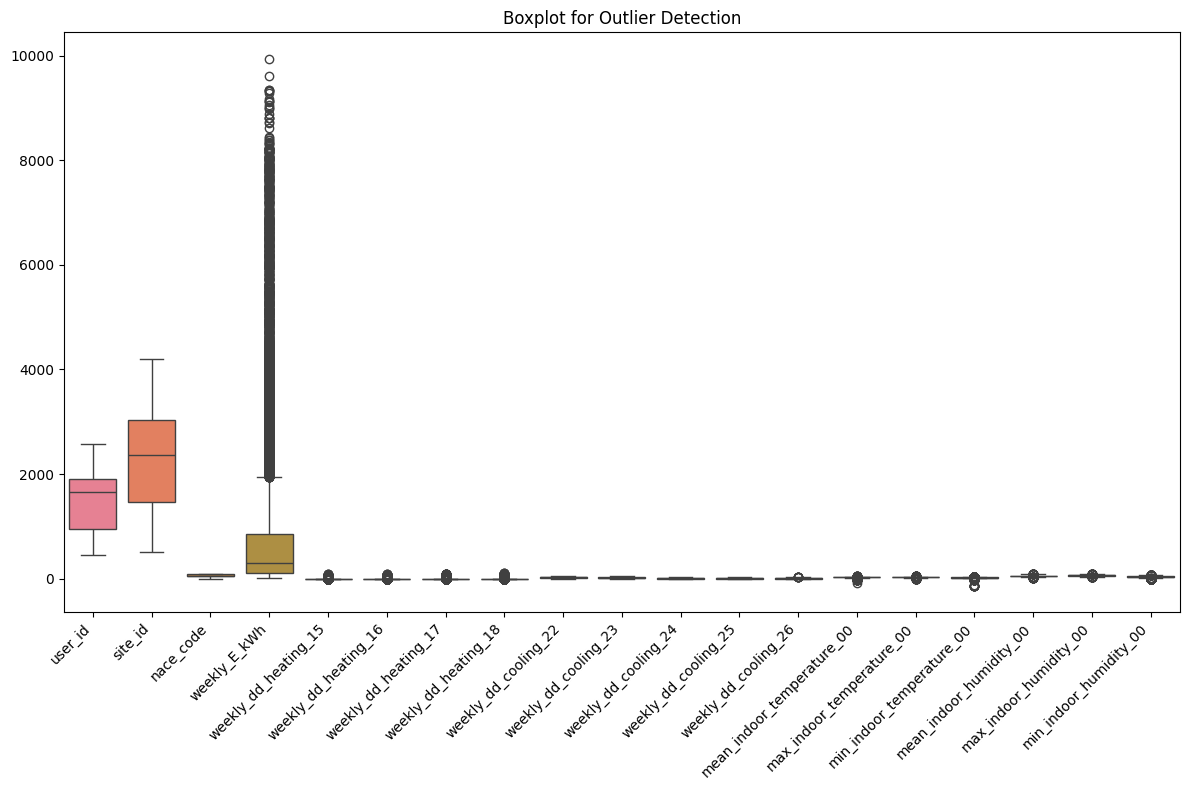

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We can see that the feature `weekly_E_kWh` contains outliers. Let's look at it more closely:

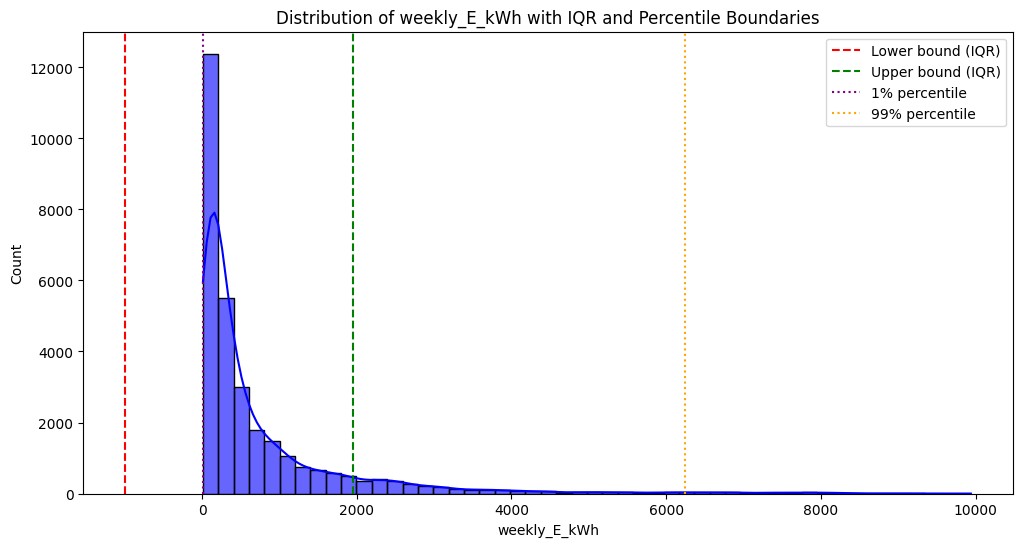

In [26]:
# Define the target column
target_col = 'weekly_E_kWh'

# Compute percentiles (1% and 99%)
p1 = np.percentile(data[target_col], 1)
p99 = np.percentile(data[target_col], 99)

# Compute quartiles and IQR (Interquartile Range)
Q1 = data[target_col].quantile(0.25)
Q3 = data[target_col].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Plot the distribution with a histogram and density curve
plt.figure(figsize=(12,6))
sns.histplot(data[target_col], bins=50, kde=True, color='blue', alpha=0.6)

# Add vertical lines for outlier thresholds
plt.axvline(lower_bound, color='red', linestyle='dashed', label="Lower bound (IQR)")
plt.axvline(upper_bound, color='green', linestyle='dashed', label="Upper bound (IQR)")
plt.axvline(p1, color='purple', linestyle='dotted', label="1% percentile")
plt.axvline(p99, color='orange', linestyle='dotted', label="99% percentile")

# Add title and legend
plt.title(f"Distribution of {target_col} with IQR and Percentile Boundaries")
plt.legend()
plt.show()

The graph shows that `weekly_E_kWh` is highly right-skewed, with most values clustered near zero and a long tail extending toward higher values. The 99th percentile is significantly higher than the IQR upper bound, indicating extreme outliers. The lower bound appears negative, which is unrealistic for energy consumption and should be ignored. These outliers could impact modeling, and applying a log transformation or using robust models might help manage their influence.

We decide not to do anything about this since some machine learning models like Decision Trees, Random Forests, and Gradient Boosting (XGBoost, LightGBM, CatBoost) handle outliers well.

### 2.3- Feature Engineering / Encoding

For Machine Learning, we need our features to contain only numbers and no "string" type. So we need to encode all our non-integer features.

We copy our dataset in a new dataframe because we will need to use a non-encoded dataframe for the data analysis later:

In [27]:
final_data = data.copy()

Let's look at the type of every feature of our dataset:

In [28]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30725 entries, 0 to 42287
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year-Wweek                  30725 non-null  object 
 1   user_id                     30725 non-null  int64  
 2   site_id                     30725 non-null  int64  
 3   department                  30725 non-null  object 
 4   nace_code                   30725 non-null  float64
 5   insee_code                  30725 non-null  object 
 6   weekly_E_kWh                30725 non-null  float64
 7   weekly_dd_heating_15        30725 non-null  float64
 8   weekly_dd_heating_16        30725 non-null  float64
 9   weekly_dd_heating_17        30725 non-null  float64
 10  weekly_dd_heating_18        30725 non-null  float64
 11  weekly_dd_cooling_22        30725 non-null  float64
 12  weekly_dd_cooling_23        30725 non-null  float64
 13  weekly_dd_cooling_24        30725 no

Let's look at the features that will need to be encoded, the categorical features:

In [29]:
# Identify the categorical features that need encoding
categorical_features = final_data.select_dtypes(include=['object']).columns.tolist()

# Print the list of features that need encoding
print("Features that need encoding:", categorical_features)

Features that need encoding: ['year-Wweek', 'department', 'insee_code']


Let's look at what thoses features look like:

In [30]:
final_data[categorical_features]

,year-Wweek,department,insee_code
0,2021-W19,Martinique,97209
1,2021-W20,Martinique,97209
2,2021-W21,Martinique,97209
3,2021-W22,Martinique,97209
4,2021-W23,Martinique,97209
...,...,...,...
42283,2024-W33,Reunion Island,97411
42284,2024-W34,Reunion Island,97411
42285,2024-W35,Reunion Island,97411
42286,2024-W36,Reunion Island,97411


Let's count the number of different unique values for thoses features:

In [31]:
# Iterate through the categorical features and count the number of unique values
for feature in categorical_features:
  unique_values_count = final_data[feature].nunique()
  print(f"Feature: {feature}, Number of different values: {unique_values_count}")

Feature: year-Wweek, Number of different values: 175
Feature: department, Number of different values: 6
Feature: insee_code, Number of different values: 117


#### Feature: `year-Wweek`

First, let's perform feature engineering on the `year-Wweek` feature. The goal is to extract meaningful components such as the year and the week number. Instead of having a single feature that combines both, which can be difficult for a machine learning model to interpret, we will split it into two separate features: one for the year and one for the week number.

In [32]:
# Extract year and week number from 'year-Wweek'
final_data['year'] = final_data['year-Wweek'].str.split('-W').str[0].astype(int)
final_data['week'] = final_data['year-Wweek'].str.split('-W').str[1].astype(int)

# Reorder the columns to place 'year' and 'week' at the beginning
cols = ['year', 'week'] + [col for col in final_data.columns if col not in ['year', 'week', 'year-Wweek']]
final_data = final_data[cols]

final_data.head()

,year,week,user_id,site_id,department,nace_code,insee_code,weekly_E_kWh,weekly_dd_heating_15,weekly_dd_heating_16,...,weekly_dd_cooling_23,weekly_dd_cooling_24,weekly_dd_cooling_25,weekly_dd_cooling_26,mean_indoor_temperature_00,max_indoor_temperature_00,min_indoor_temperature_00,mean_indoor_humidity_00,max_indoor_humidity_00,min_indoor_humidity_00
0,2021,19,458,513,Martinique,72.19,97209,645.595,0.0,0.0,...,23.782,16.877,10.505,6.140,27.147,28.60,22.37,66.107,75.0,0.0
1,2021,20,458,513,Martinique,72.19,97209,621.710,0.0,0.0,...,29.014,22.014,15.133,9.265,28.244,29.32,25.16,64.013,69.0,48.0
2,2021,21,458,513,Martinique,72.19,97209,593.756,0.0,0.0,...,26.712,19.863,13.425,8.437,27.905,28.99,23.71,63.005,73.0,0.0
3,2021,22,458,513,Martinique,72.19,97209,598.007,0.0,0.0,...,24.759,17.845,11.288,6.280,27.587,29.06,23.48,65.250,73.0,54.0
4,2021,23,458,513,Martinique,72.19,97209,616.960,0.0,0.0,...,26.923,19.925,13.151,7.506,27.454,29.17,23.68,69.894,76.0,55.0


#### Features: `department` and `insee_code`

Second, let's perform feature encoding on the `department` and the `insee_code` features. The goal is to encode the those two features because it is the only way they can be used for machine learning models.

In [33]:
# Create a LabelEncoder object
label_encoder_department = LabelEncoder()
label_encoder_insee_code = LabelEncoder()

# Fit and transform the 'department' column
final_data['department_encoded'] = label_encoder_department.fit_transform(final_data['department'])

# Fit and transform the 'insee_code' column
final_data['insee_code_encoded'] = label_encoder_insee_code.fit_transform(final_data['insee_code'])

# Replace the original columns with the encoded ones
final_data = final_data.drop(['department', 'insee_code'], axis=1)

# Reorder columns to put encoded features where the original ones were.
cols = list(final_data.columns)
cols.remove('department_encoded')
cols.remove('insee_code_encoded')
new_cols = cols[:4] + ['department_encoded', 'insee_code_encoded'] + cols[4:]
final_data = final_data[new_cols]

final_data.head()

,year,week,user_id,site_id,department_encoded,insee_code_encoded,nace_code,weekly_E_kWh,weekly_dd_heating_15,weekly_dd_heating_16,...,weekly_dd_cooling_23,weekly_dd_cooling_24,weekly_dd_cooling_25,weekly_dd_cooling_26,mean_indoor_temperature_00,max_indoor_temperature_00,min_indoor_temperature_00,mean_indoor_humidity_00,max_indoor_humidity_00,min_indoor_humidity_00
0,2021,19,458,513,3,60,72.19,645.595,0.0,0.0,...,23.782,16.877,10.505,6.140,27.147,28.60,22.37,66.107,75.0,0.0
1,2021,20,458,513,3,60,72.19,621.710,0.0,0.0,...,29.014,22.014,15.133,9.265,28.244,29.32,25.16,64.013,69.0,48.0
2,2021,21,458,513,3,60,72.19,593.756,0.0,0.0,...,26.712,19.863,13.425,8.437,27.905,28.99,23.71,63.005,73.0,0.0
3,2021,22,458,513,3,60,72.19,598.007,0.0,0.0,...,24.759,17.845,11.288,6.280,27.587,29.06,23.48,65.250,73.0,54.0
4,2021,23,458,513,3,60,72.19,616.960,0.0,0.0,...,26.923,19.925,13.151,7.506,27.454,29.17,23.68,69.894,76.0,55.0


### 2.4- Other


Let's put our target feature as the last column in our dataset:

In [34]:
cols = final_data.columns.tolist()
cols.remove('weekly_E_kWh')
cols.append('weekly_E_kWh')
final_data = final_data[cols]

Here is the result:

In [35]:
final_data.head()

,year,week,user_id,site_id,department_encoded,insee_code_encoded,nace_code,weekly_dd_heating_15,weekly_dd_heating_16,weekly_dd_heating_17,...,weekly_dd_cooling_24,weekly_dd_cooling_25,weekly_dd_cooling_26,mean_indoor_temperature_00,max_indoor_temperature_00,min_indoor_temperature_00,mean_indoor_humidity_00,max_indoor_humidity_00,min_indoor_humidity_00,weekly_E_kWh
0,2021,19,458,513,3,60,72.19,0.0,0.0,0.0,...,16.877,10.505,6.140,27.147,28.60,22.37,66.107,75.0,0.0,645.595
1,2021,20,458,513,3,60,72.19,0.0,0.0,0.0,...,22.014,15.133,9.265,28.244,29.32,25.16,64.013,69.0,48.0,621.710
2,2021,21,458,513,3,60,72.19,0.0,0.0,0.0,...,19.863,13.425,8.437,27.905,28.99,23.71,63.005,73.0,0.0,593.756
3,2021,22,458,513,3,60,72.19,0.0,0.0,0.0,...,17.845,11.288,6.280,27.587,29.06,23.48,65.250,73.0,54.0,598.007
4,2021,23,458,513,3,60,72.19,0.0,0.0,0.0,...,19.925,13.151,7.506,27.454,29.17,23.68,69.894,76.0,55.0,616.960


This is our final dataset.

# **Phase 2: Analysis and Modeling**

Objective: Explore the data and create models adapted to the issues identified.

## 1- Exploratory data analysis (EDA)

*- Identify main trends, consumption patterns, anomalies and correlations with other variables (e.g. temperature, days of the week, special events).*

*- Visualize these results in simple, relevant graphs (trend curves, histograms, scatter diagrams, etc.).*

### **Average weekly energy consumption per type of activity of the company**

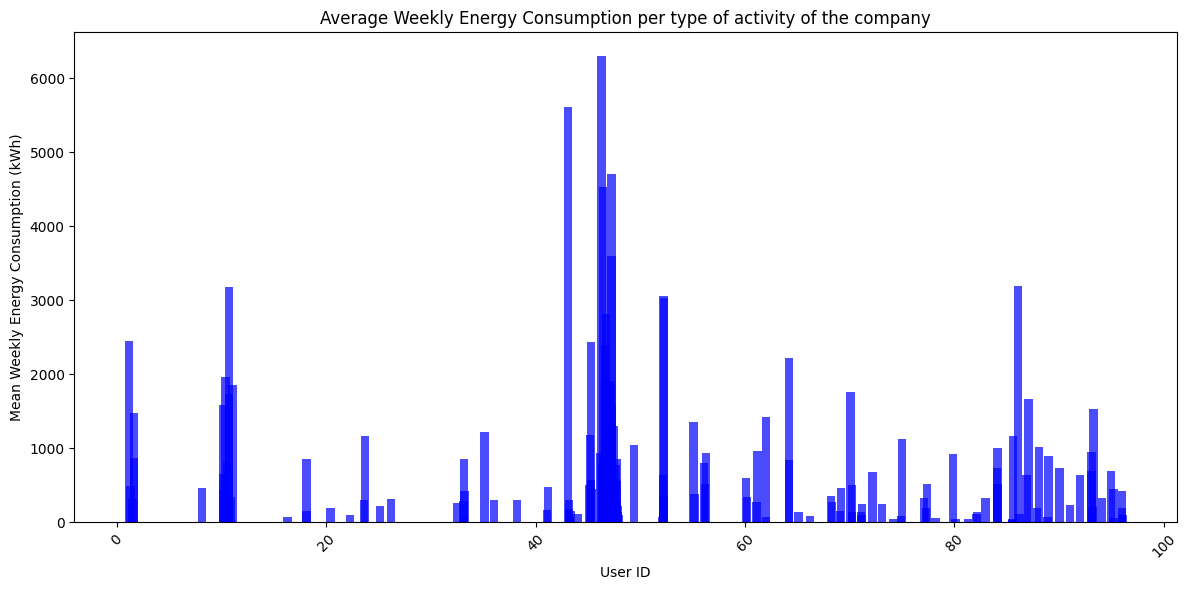

In [36]:
# Compute the mean weekly_E_kWh for each nace_code
mean_consumption = data.groupby('nace_code')['weekly_E_kWh'].mean().reset_index()

# Rename the column for clarity
mean_consumption.rename(columns={'weekly_E_kWh': 'mean_weekly_E_kWh'}, inplace=True)

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(mean_consumption['nace_code'], mean_consumption['mean_weekly_E_kWh'], color='blue', alpha=0.7)
plt.xlabel("User ID")
plt.ylabel("Mean Weekly Energy Consumption (kWh)")
plt.title("Average Weekly Energy Consumption per type of activity of the company")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Average weekly energy consumption per user**

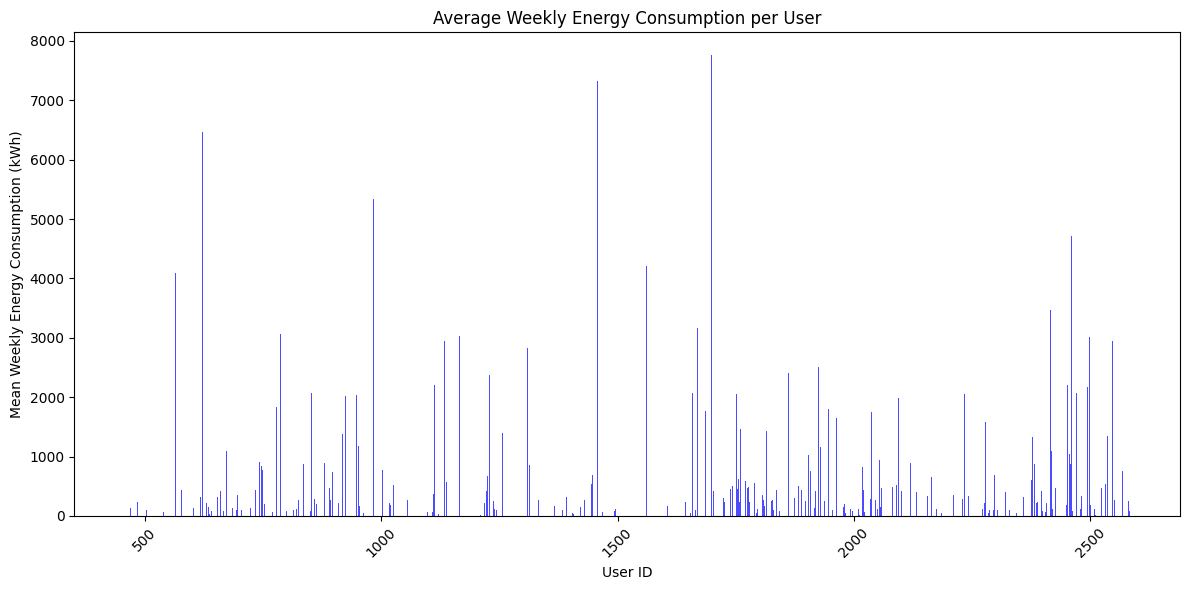

In [37]:
# Compute the mean weekly_E_kWh for each user_id
mean_consumption = data.groupby('user_id')['weekly_E_kWh'].mean().reset_index()

# Rename the column for clarity
mean_consumption.rename(columns={'weekly_E_kWh': 'mean_weekly_E_kWh'}, inplace=True)

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(mean_consumption['user_id'], mean_consumption['mean_weekly_E_kWh'], color='blue', alpha=0.7)
plt.xlabel("User ID")
plt.ylabel("Mean Weekly Energy Consumption (kWh)")
plt.title("Average Weekly Energy Consumption per User")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


It is evident that one user consumes significantly more energy than the others.

## 2- Modeling

*- Predictive model: Build a model that predicts energy consumption based on the factors identified.*

*- Anomaly detection: Develop a model to identify atypical consumption periods or energy peaks.*

*- Classification: Identify consumption periods (e.g. days with high consumption, peak hours).*

*- Students can choose from several techniques: regression, clustering, time series, or others depending on the nature of the data.*

## 3- Model Evaluation and Optimization

*- Test and compare model performance using appropriate evaluation criteria (e.g. accuracy, RMSE, etc.).*

*- Optimize models to improve accuracy or relevance of results.*

# **Phase 3: Visualization and presentation of results**

Objective: Communicate results clearly and concisely.

## 1- Creating a dashboard

*- Develop an interactive dashboard to visualize the results of analyses and models, for example :*
  - Estimated energy consumption.
  - Detection of consumption peaks.
  - Classification or clustering results.

*- Free choice of visualization tools (e.g. Tableau, Power BI, etc.).*

**This part is done in another code named ...**

## 2- Preparing the final presentation

*- Context and challenges: Explain business needs and energy consumption issues.*

*- Methodological approach: Describe the steps taken, choice of tools, data collection, preparation, analyses performed and models developed...*

*- Presentation of results and insights*

*- Recommendations : Propose concrete actions based on the results of the analyses, as optimization levers for managing energy consumption.*

**This part is done in a PDF file named ...**